In [57]:
import numpy as np
import pandas as pd
import scipy
import scipy.io

import sys, os, time
import glob

from matplotlib import pyplot as plt
%matplotlib inline

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('legend',**{'fontsize':12})
from skimage.transform import resize
from skimage.io import imsave

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from IPython.display import clear_output

##### OSM related ######
import math
import overpass

import copy as cp 

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Construct bounding box class

This is used for extracting osm map tile according to overpass api 

In [23]:
class BoundingBox(object):
    def __init__(self, *args, **kwargs):
        self.lat_min = None
        self.lon_min = None
        self.lat_max = None
        self.lon_max = None


def get_bounding_box(latitude_in_degrees, longitude_in_degrees, half_side_in_miles):
    assert half_side_in_miles > 0
    assert latitude_in_degrees >= -90.0 and latitude_in_degrees  <= 90.0
    assert longitude_in_degrees >= -180.0 and longitude_in_degrees <= 180.0

    half_side_in_km = half_side_in_miles * 1.609344
    lat = math.radians(latitude_in_degrees)
    lon = math.radians(longitude_in_degrees)

    radius  = 6371
    # Radius of the parallel at given latitude
    parallel_radius = radius*math.cos(lat)

    lat_min = lat - half_side_in_km/radius
    lat_max = lat + half_side_in_km/radius
    lon_min = lon - half_side_in_km/parallel_radius
    lon_max = lon + half_side_in_km/parallel_radius
    rad2deg = math.degrees

    box = BoundingBox()
    box.lat_min = rad2deg(lat_min)
    box.lon_min = rad2deg(lon_min)
    box.lat_max = rad2deg(lat_max)
    box.lon_max = rad2deg(lon_max)

    return (box)

In [5]:
%%latex 
read in the response file of Afrobarometer  

<IPython.core.display.Latex object>

In [24]:
file_p = "../data/es262-infrastructure-b-01/Afrobarometer_R6.csv"
afrob_df=pd.read_csv(file_p)

In [25]:
sub_df = afrob_df[['latitude', 'longitude', 'id']]
api = overpass.API()

In [33]:
import time 


In [44]:
collection_mat = dict()
for i in range(sub_df.shape[0]):
    if i > 5: break
    _id = sub_df.loc[i, "id"]
    collect_hwy = []
    for k in range(1, 6):
        k = np.round(k*0.2, 3)
        #if i > 3 : break
        lat_ = (sub_df.loc[i, "latitude"])
        lng_ = (sub_df.loc[i, "longitude"])
        box = get_bounding_box(lat_, lng_, k)
        map_query2 = overpass.MapQuery(np.round(box.lat_min, 5), np.round(box.lon_min, 5), np.round(box.lat_max, 5), np.round(box.lon_max,5) )
        response2 = api.Get(map_query2)
#         response2
        time.sleep(5.0)
        tmp_count = 0
        for collectted_dict in (response2["features"]):
            if "highway" in collectted_dict["properties"].keys() :
                print(collectted_dict["properties"])
                tmp_count +=1 
                
        collect_hwy.append((k, tmp_count))
        
    collection_mat[_id]= collect_hwy        

{'maxspeed': '50', 'highway': 'tertiary', 'oneway': 'no'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'maxspeed': '50', 'highway': 'tertiary'}
{'highway': 'residential', 'oneway': 'yes'}
{'highway': 'residential', 'oneway': 'yes'}
{'highway': 'residential'}
{'maxspeed': '50', 'highway': 'tertiary', 'surface': 'asphalt'}
{'highway': 'residential'}
{'access': 'no', 'highway': 'path', 'foot': 'yes'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'service'}
{'highway': 'footway', 'bridge': 'yes', 'layer': '1'}
{'highway': 'residential'}
{'highway': 'residential', 'name': 'Cite Ben Taiba'}
{'highway': 'residential', 'name': 'Cite Ben Taiba'}
{'highway': 'residential', 'name': 'Cite Ben Taiba'}
{'highway': 'residential', 'name': 'Cite Ben Taiba'}
{'highway': 'residential', 'name': 'Cite Ben Taiba'}
{'hi

{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'mini_roundabout'}
{'highway': 'give_way'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'stop'}
{'highway': 'stop'}
{'highway': 'stop'}
{'highway': 'stop

{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'mini_roundabout'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highwa

{'maxspeed': '30', 'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'secondary', 'oneway': 'no'}
{'highway': 'residential'}
{'highway': 'tertiary', 'oneway': 'yes'}
{'highway': 'residential'}
{'highway': 'residential', 'name': 'Rue Bou Traifis- بوترفيس', 'name:ar': 'بوترفيس'}
{'highway': 'residential', 'name': 'Rue Bou Traifis- بوترفيس', 'name:ar': 'بوترفيس'}
{'highway': 'residential'}
{'highway': 'residential', 'oneway': 'no'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'embankment': 'yes', 'highway': 'service'}
{'highway': 'service'}
{'highway': 'service'}
{'highway': 'service'}
{'highway': 'secondary'}
{'highway': 'service'}
{'highway': 'secondary', 'oneway': 'no'}
{'highway': 'secondary', 'oneway': 'no'}
{'highway': 'yes', 'oneway': 'no'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'service'}
{'highway':

{'highway': 'primary', 'surface': 'paved', 'ref': 'RNIE 4', 'fixme': 'low accuracy', 'source:date': '2011', 'source': 'Bing'}
{'surface': 'unpaved', 'highway': 'tertiary', 'source:date': '2011', 'source': 'Bing'}
{'highway': 'primary', 'surface': 'paved', 'source': 'GPS track', 'ref': 'RNIE 4; RN 2 bis'}
{'surface': 'paved', 'highway': 'primary', 'source:date': 'Bing:2011', 'source': 'GPS;Bing', 'ref': 'RN 2 bis'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'se

{'highway': 'primary', 'surface': 'paved', 'ref': 'RNIE 4', 'fixme': 'low accuracy', 'source:date': '2011', 'source': 'Bing'}
{'surface': 'unpaved', 'highway': 'tertiary', 'source:date': '2011', 'source': 'Bing'}
{'highway': 'primary', 'surface': 'paved', 'source': 'GPS track', 'ref': 'RNIE 4; RN 2 bis'}
{'surface': 'paved', 'highway': 'primary', 'source:date': 'Bing:2011', 'source': 'GPS;Bing', 'ref': 'RN 2 bis'}
{'highway': 'unclassified'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'r

{'maxspeed': '60', 'highway': 'primary', 'surface': 'paved', 'lanes': '2'}
{'highway': 'tertiary'}
{'highway': 'tertiary', 'surface': 'paved'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'track'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'

{'maxspeed': '60', 'highway': 'primary', 'surface': 'paved', 'lanes': '2'}
{'highway': 'tertiary'}
{'highway': 'tertiary', 'surface': 'paved'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'track'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'

{'maxspeed': '60', 'highway': 'primary', 'surface': 'paved', 'lanes': '2'}
{'highway': 'tertiary'}
{'highway': 'tertiary', 'surface': 'paved'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'track'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'

{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'path'}
{'highway': 'path'}
{'highway': 'path'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'track'}
{'highway': 'path'}
{'highway': 'path'}
{'highway': 'resident

{'highway': 'residential'}
{'highway': 'primary', 'surface': 'unpaved', 'ref': 'N15', 'tracktype': 'grade2'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'tertiary'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'residential'}
{'highway': 'path'}
{'highway': 'unclassified'}
{'highway': 'path'}
{'highway': 'unclassified'}
{'highway': 'path'}
{'highway': 'track'}
{'highway': 'unclassified'}
{'highway': 'path'}
{'highway': 'unclassified'}
{'highway': 'path'}
{'highway': 'path'}
{'highway': 'residential'}
{'highway': 'path'}
{'highway': 'path'}
{'highway': 'path'}
{'area': 'yes', 'highway': 'path'}
{'highway': 'path'}
{'highway': '

{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'crossing': 'traffic_signals', 'highway': 'traffic_signals', 'source': 'survey'}
{'crossing': 'traffic_signals', 'highway': 'traffic_signals', 'source': 'survey'}
{'crossing': 'traffic_signals', 'highway': 'traffic_signals', 'source': 'survey'}
{'crossing': 'traffic_signals', 'highway': 'traffic_signals', 'source': 'survey'}
{'highway': 'tertiary', 'source': 'yahoo', 'name': 'Boulevard du Caire'}
{'highway': 'tertiary', 'source': 'yahoo', 'noname': 'yes'}
{'highway': 'tertiary', 'source': 'yahoo'}
{'traffic_signals:direction': 'forward', 'highway': 'tertiary', 'source': 'yahoo', 'name': 'Boulevard du Cameroun'}
{'highway': 'tertiary', 'source': 'yahoo', 'name': 'Rue F84'}
{'highway': 'residential', 'source': 'yahoo'}
{'highway': 'residential', 'source': 'yahoo'}
{'highway': 'residential', 'source': 'yahoo'}
{'highway': 'residential', 'source': 'yahoo'}
{'highway': 'tertiary', 'source': 'yahoo', 'name': 'Rue Raoul Follereau'

{'highway': 'traffic_signals'}
{'highway': 'traffic_signals', 'direction': 'forward'}
{'highway': 'traffic_signals'}
{'amenity': 'taxi', 'highway': 'bus_stop', 'share_taxi': 'yes', 'name': "Gare de Wôrô-Wôrô d'Anoumabo", 'bus': 'yes', 'public_transport': 'platform'}
{'shelter': 'no', 'highway': 'bus_stop', 'operator': 'SOTRA'}
{'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03-31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03-31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'highway': 'bus_stop', 'name': 'woro woro adjame'}
{'traffic_signals:direction': 'forward', 'highway': 'traffic_signals'}
{'highway': 'bus_stop', 'name': 'Wôrô-wôrô'}
{'highway': 'bus_stop'}
{'highway': 'give_way'}
{'traffic_signals:direction': 'backward', 'highway': 'traffic_signals'}
{'crossing': 'traffic_signals', 'highway': 'traffic_signals'}
{'crossing': 'traffic_signals', 'highway': 'traffi

{'highway': 'traffic_signals'}
{'highway': 'traffic_signals'}
{'highway': 'traffic_signals', 'direction': 'forward'}
{'highway': 'traffic_signals'}
{'amenity': 'taxi', 'highway': 'bus_stop', 'share_taxi': 'yes', 'name': "Gare de Wôrô-Wôrô d'Anoumabo", 'bus': 'yes', 'public_transport': 'platform'}
{'shelter': 'no', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arret de bus'}
{'shelter': 'no', 'highway': 'bus_stop', 'operator': 'SOTRA'}
{'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03 -31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03-31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03-31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'shelter': '03-31', 'highway': 'bus_stop', 'operator': 'SOTRA', 'name': 'Arrêt de bus (03-31)'}
{'highway': 'bus_stop', 'operator': 'Sotra', 'name': 'Terminus 13,26,33,...'}
{'highway'

In [45]:
collection_mat

{1: [(0.20000000000000001, 33),
  (0.40000000000000002, 91),
  (0.59999999999999998, 338),
  (0.80000000000000004, 775),
  (1.0, 1262)],
 2: [(0.20000000000000001, 23),
  (0.40000000000000002, 69),
  (0.59999999999999998, 130),
  (0.80000000000000004, 153),
  (1.0, 156)],
 3: [(0.20000000000000001, 47),
  (0.40000000000000002, 206),
  (0.59999999999999998, 338),
  (0.80000000000000004, 432),
  (1.0, 522)],
 4: [(0.20000000000000001, 0),
  (0.40000000000000002, 0),
  (0.59999999999999998, 0),
  (0.80000000000000004, 0),
  (1.0, 0)],
 5: [(0.20000000000000001, 16),
  (0.40000000000000002, 72),
  (0.59999999999999998, 179),
  (0.80000000000000004, 260),
  (1.0, 329)],
 6: [(0.20000000000000001, 37),
  (0.40000000000000002, 118),
  (0.59999999999999998, 288),
  (0.80000000000000004, 555),
  (1.0, 878)]}

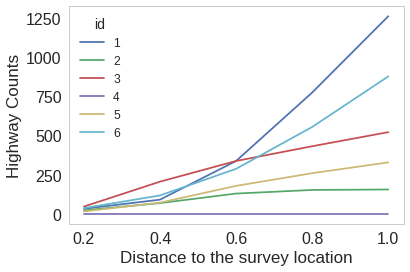

In [60]:

for k in range(1,7):
    x = []
    y = []
    for a, b in (collection_mat[k]):
        x.append(a)
        y.append(b)

    plt.plot(x,y, label="%d"%k)
    plt.xlabel("Distance to the survey location", fontsize=17)
    legend_ = plt.legend(title="id", fontsize=12)
    legend_.get_title().set_fontsize('14')
    plt.ylabel("Highway Counts", fontsize=17)
    